In [438]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [439]:
# R[a, b]
alpha_ = 0.01

data_ = [
    14.495, 4.715, 7.175, 8.428, 11.093, 3.375, 12.906, 8.415, 8.916, 13.48,
    5.343, 17.985, 15.992, 13.89, 9.838, 13.924, 9.012, 9.458, 17.69, 6.542,
    14.396, 8.592, 8.206, 14.237, 7.357, 10.821, 12.767, 16.058, 12.959, 4.354,
    12.888, 10.268, 9.182, 5.647, 8.282, 2.903, 15.988, 12.959, 14.919, 6.339,
    2.375, 17.921, 9.097, 15.85, 11.449, 11.095, 9.493, 12.175, 7.479, 13.535,
    9.234, 6.078, 4.964, 6.355, 13.957, 12.911, 15.694, 14.286, 9.869, 5.175,
    5.811, 7.241, 5.814, 3.086, 6.875, 3.878, 5.333, 15.134, 12.924, 9.159,
    4.727, 4.646, 15.535, 9.919, 17.117, 10.351, 16.892, 12.423, 10.511, 4.942,
    4.843, 9.927, 15.864, 3.635, 17.963, 8.25, 5.14, 6.734, 12.622, 13.325,
    3.377, 16.195, 12.04, 12.768, 2.744, 14.186, 9.354, 15.439, 14.612, 15.649,
    8.681, 5.006, 3.608, 2.867, 12.177, 15.506, 7.683, 14.022, 17.103, 8.905,
    12.173, 17.757, 6.883, 2.666, 9.861, 5.743, 16.175, 15.308, 7.039, 15.238
]

# data_ = [
#     -9.295, -3.358, 2.066, 7.274, -1.696, 4.747, -4.754, -6.652, 7.84, -5.289,
#     -5.069, -4.103, -2.936, -5.437, 7.91, 6.804, 9.949, -6.66, -4.955, 9.623,
#     0.519, -4.46, 1.355, -9.714, 9.175, 8.076, -1.415, 0.299, -8.468, -0.27,
#     0.295, -7.546, -0.266, -6.898, 9.425, 9.027, -3.708, 9.066, -1.614, 2.481,
#     0.409, 3.727, 1.631, 8.671, 6.807, -2.134, 0.733, -7.457, -2.944, -1.1,
#     1.967, 6.348, 3.404, -4.67, 6.384, 0.329, 5.1, 3.699, -7.607, 5.938,
#     -2.77, 8.04, -9.167, -8.469, -7.963, -8.165, -7.44, -9.424, -7.244, 2.461,
#     8.518, 2.351, -0.067, 8.152, 2.319, 5.154, -9.733, 7.442, -4.676, 1.999,
#     7.925, -8.872, 4.215, -1.175, 8.375, -3.285, -8.919, -4.808, -5.282, -4.627,
#     5.988, 7.496, 6.509, -8.608, 2.063, 4.657, 1.091, -5.87, 3.072, -3.666
# ]

In [440]:
def decorate_plot(ax, x_ticks, xname, yname, loc=(-0.025, -0.3)):
    SIZE_TICKS = 10

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # axis names
    ax.set_xlabel(xname, fontsize=15)
    ax.xaxis.set_label_coords(0.98, 0.05)

    ax.set_ylabel(yname, rotation=0, fontsize=15)
    ax.yaxis.set_label_coords(0.025, 0.95)

    ax.set_xticks(x_ticks)

    # Adjust the font size of the tick labels
    ax.tick_params(axis='both', which='major', labelsize=SIZE_TICKS)

    plt.legend(fontsize=10, loc=loc)

    # Update font settings
    plt.rcParams.update({'font.family': 'serif', 'font.size': 12})

    # Adjust layout
    plt.tight_layout()

In [441]:
def clean(data):
    res = []
    for el in data:
        res.append(round(el, 3))
    return res

In [442]:
def group(data):
    n_ = len(data)
    print(f'n: {n_}')

    min_ = min(data)
    max_ = max(data)
    print(f'min: {min_}     max: {max_}')

    range_ = max_ - min_
    print(f'range: {range_}')

    l_ = 1 + int(np.log2(n_))
    print(f'l: {l_}')

    h_ = range_ / l_
    print(f'h: {h_}')

    int_boundaries_ = np.array(
        [min_ + i * h_ for i in range(0, l_ + 1, 1)]
    )
    print(f'interval boundaries: {int_boundaries_}')
    intervals_ = np.array(
        [(int_boundaries_[i], int_boundaries_[i+1]) for i in range(0, l_, 1)]
    )
    print(f'intervals: {intervals_}')
    mid_ranges_ = np.array(
        [sum(interval)/2 for interval in intervals_]
    )
    print(f'intervals\' midpoints: {mid_ranges_}')

    present = lambda el, int_ : int_[0] <= el < int_[1]
    freqs_ = np.zeros(l_)
    for el in data:
        for j in range(0, l_, 1):
            if present(el, intervals_[j]):
                freqs_[j] += 1 

    freqs_[-1] += np.count_nonzero(data == max_)
    print(f'frequencies: {freqs_}')

    rel_freqs_ = freqs_ / n_
    print(f'relative frequencies: {rel_freqs_}')

    rel_freqs_density_ = rel_freqs_ / h_
    print(f'relative frequencies\' density: {rel_freqs_density_}')

    print(f'-'*100)

    space_ = ' ' * 5
    for i in range(l_):
        print(f'{intervals_[i]}{space_}{freqs_[i]}{space_}{rel_freqs_[i]}{space_}{rel_freqs_density_[i]}')
    
    return n_, min_, max_, range_, l_, h_, int_boundaries_, intervals_, mid_ranges_, freqs_, rel_freqs_, rel_freqs_density_

n_, min_, max_, range_, l_, h_, int_boundaries_, intervals_, mid_ranges_, freqs_, rel_freqs_, rel_freqs_density_ = group(data_)

n: 120
min: 2.375     max: 17.985
range: 15.61
l: 7
h: 2.23
interval boundaries: [ 2.375  4.605  6.835  9.065 11.295 13.525 15.755 17.985]
intervals: [[ 2.375  4.605]
 [ 4.605  6.835]
 [ 6.835  9.065]
 [ 9.065 11.295]
 [11.295 13.525]
 [13.525 15.755]
 [15.755 17.985]]
intervals' midpoints: [ 3.49  5.72  7.95 10.18 12.41 14.64 16.87]
frequencies: [12. 20. 18. 18. 17. 20. 14.]
relative frequencies: [0.1        0.16666667 0.15       0.15       0.14166667 0.16666667
 0.11666667]
relative frequencies' density: [0.04484305 0.07473842 0.06726457 0.06726457 0.06352765 0.07473842
 0.05231689]
----------------------------------------------------------------------------------------------------
[2.375 4.605]     12.0     0.1     0.044843049327354265
[4.605 6.835]     20.0     0.16666666666666666     0.07473841554559044
[6.835 9.065]     18.0     0.15     0.06726457399103139
[ 9.065 11.295]     18.0     0.15     0.06726457399103139
[11.295 13.525]     17.0     0.14166666666666666     0.06352765321

In [443]:
# a = a1
# b = b1

a = min_
b = max_

theorIntHitProbs_  = [] # p_j
theorIntHitProbsN_ = [] # n*p_j

cdf_ = lambda x : sp.stats.uniform.cdf(x, loc=a, scale=b-a)

for interval in intervals_:
    beg = interval[0]
    end = interval[1]

    theorIntHitProb = cdf_(end) - cdf_(beg)
    theorIntHitProbs_.append(theorIntHitProb)

    theorIntHitProbsN_.append(n_ * theorIntHitProb)

print(f'p_i: {clean(theorIntHitProbs_)}')
print(f'n * p_i: {clean(theorIntHitProbsN_)}')

p_i: [0.143, 0.143, 0.143, 0.143, 0.143, 0.143, 0.143]
n * p_i: [17.143, 17.143, 17.143, 17.143, 17.143, 17.143, 17.143]


In [444]:
sum(theorIntHitProbs_)

1.0

In [445]:
Chi2_v = sum([((freqs_[i] - theorIntHitProbsN_[i])**2)/theorIntHitProbsN_[i] for i in range(l_)])
Chi2_v

3.158333333333341

In [446]:
quantile = sp.stats.chi2.ppf(1 - alpha_, l_ - 1 - 2)
quantile

13.276704135987622

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


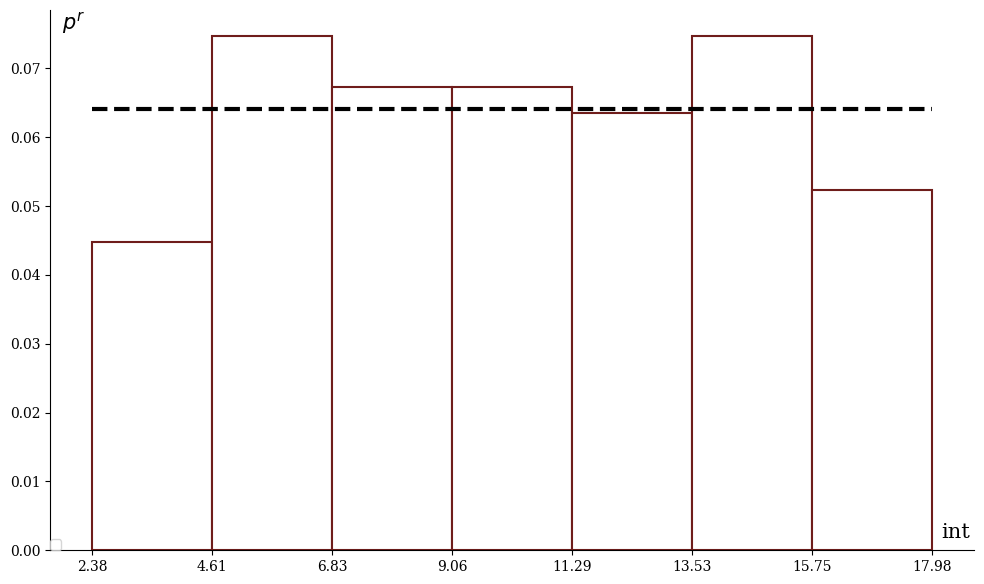

In [447]:
def buildBar(filename):
    RED = '#6F1D1B'

    _, ax = plt.subplots(figsize=(10, 6))

    x_values = mid_ranges_
    y_values = rel_freqs_density_

    ax.bar(x_values, 
           y_values, 
           width=h_, 
           color='white',
           edgecolor=RED, 
           linestyle='-', 
           linewidth=1.5, 
           align='center')
    
    x_values = np.linspace(min_, max_, 100)
    y_values = sp.stats.uniform.pdf(x_values, loc=a, scale=b-a)
    ax.plot(x_values, 
            y_values, 
            color='black',
            linestyle='--', 
            linewidth=3)

    decorate_plot(ax, int_boundaries_, 'int', '$p^r$', loc=(0, 0))

    plt.savefig(f'{filename}.png', dpi=300, transparent=True)

    plt.show()

buildBar('hist')